In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [3]:
df = pd.read_csv("final.csv")

In [5]:
list(df.columns)

['year',
 'sport_name',
 'location',
 'season',
 'duration(h)',
 'number_of_participants',
 'day_of_the_week',
 'with_trainer',
 'price(USD)']

In [6]:
for i in list(df.columns):
    print(f'{i}: {df[i].unique()}')

year: [2020 2021 2022 2023 2024]
sport_name: ['Surfing' 'Kayaking']
location: ['Weligama' 'Arugam Bay' 'Unawatuna' 'Madu River']
season: ['Off-season' 'Peak']
duration(h): ['one hour' 'three hours' 'six hours' 'one day' 'three day']
number_of_participants: [ 1  2  5  8 10]
day_of_the_week: ['week day' 'weekend day']
with_trainer: ['No' 'Yes']
price(USD): [  3.    3.6   8.  ... 351.5 361.8 411.8]


In [3]:
df.head()

,year,sport_name,location,season,duration(h),number_of_participants,day_of_the_week,with_trainer,price(USD)
0,2020,Surfing,Weligama,Off-season,one hour,1,week day,No,3.0
1,2020,Surfing,Weligama,Off-season,one hour,1,weekend day,No,3.6
2,2020,Surfing,Weligama,Peak,three hours,1,week day,No,8.0
3,2020,Surfing,Weligama,Peak,three hours,1,weekend day,No,9.6
4,2020,Surfing,Weligama,Peak,six hours,1,week day,No,10.0


In [4]:
df.describe()

,year,number_of_participants,price(USD)
count,3048.000000,3048.000000,3048.000000
mean,2021.976050,4.988845,133.578860
std,1.415055,3.372100,107.614807
min,2020.000000,1.000000,3.000000
25%,2021.000000,2.000000,48.375000
50%,2022.000000,5.000000,101.025000
75%,2023.000000,8.000000,192.570000
max,2024.000000,10.000000,457.920000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3048 non-null   int64  
 1   sport_name              3048 non-null   object 
 2   location                3048 non-null   object 
 3   season                  3048 non-null   object 
 4   duration(h)             3048 non-null   object 
 5   number_of_participants  3048 non-null   int64  
 6   day_of_the_week         3048 non-null   object 
 7   with_trainer            3048 non-null   object 
 8   price(USD)              3048 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 214.4+ KB


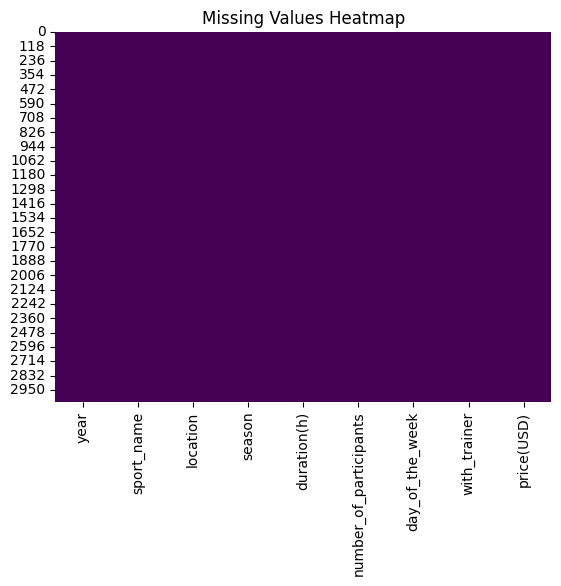

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df.shape

(3048, 9)

In [8]:
df.columns

Index(['year', 'sport_name', 'location', 'season', 'duration(h)',
       'number_of_participants', 'day_of_the_week', 'with_trainer',
       'price(USD)'],
      dtype='object')

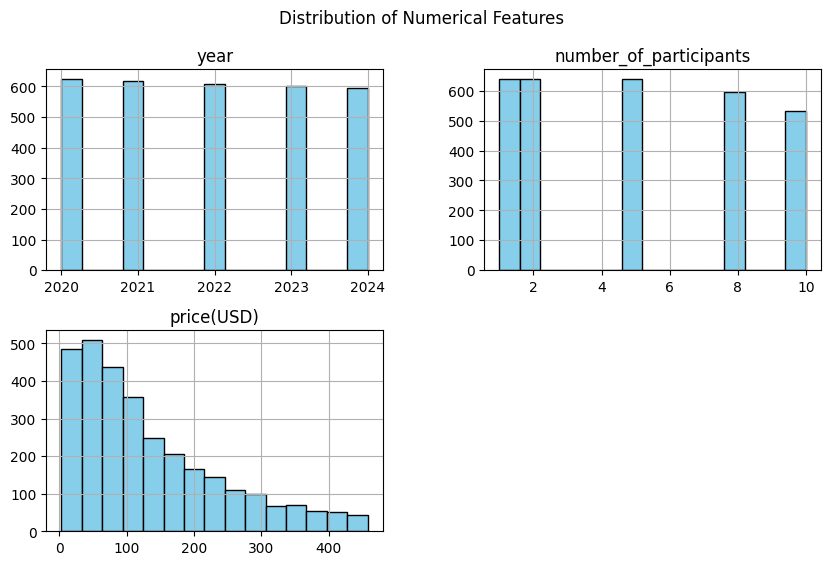

In [9]:
# Plot histograms for numerical features
df[["year",'number_of_participants', 'price(USD)']].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.axis("off")
plt.show()




In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)


['sport_name', 'location', 'season', 'duration(h)', 'day_of_the_week', 'with_trainer']


C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


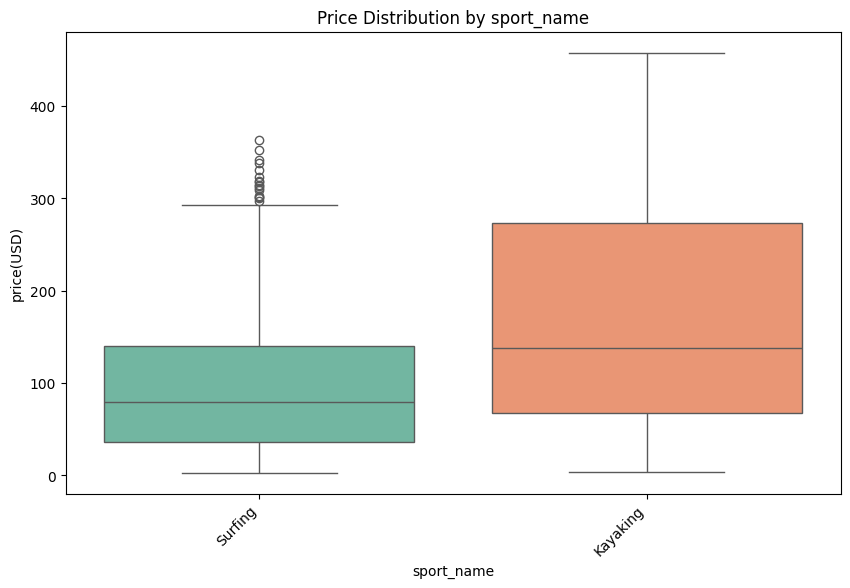

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


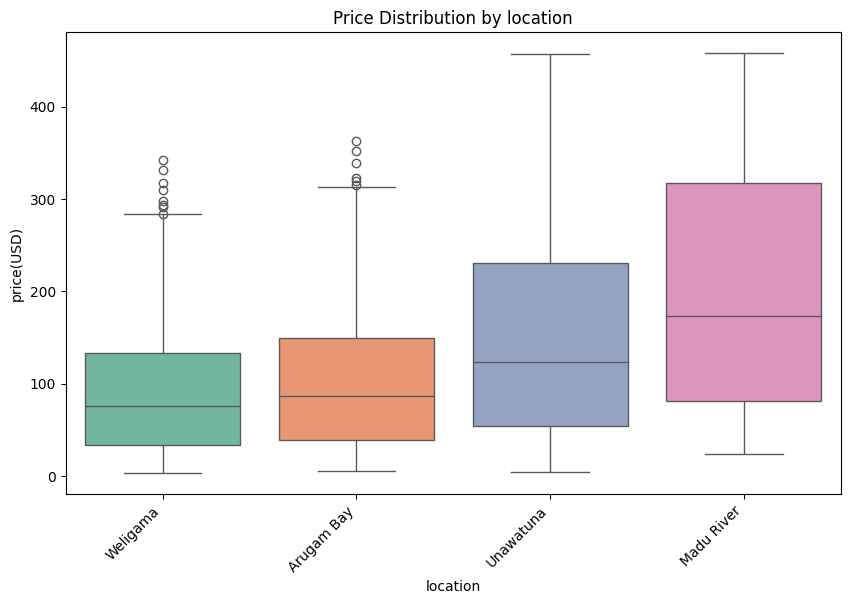

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


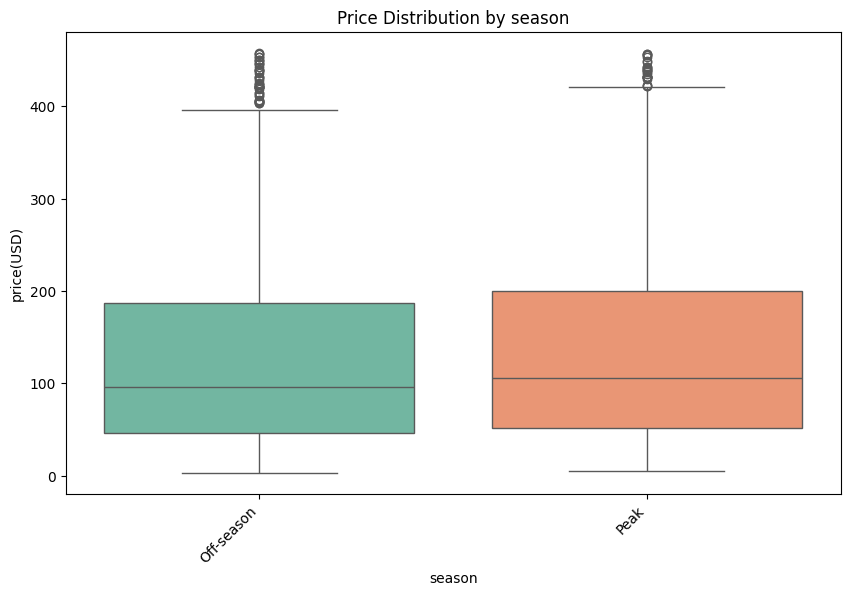

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


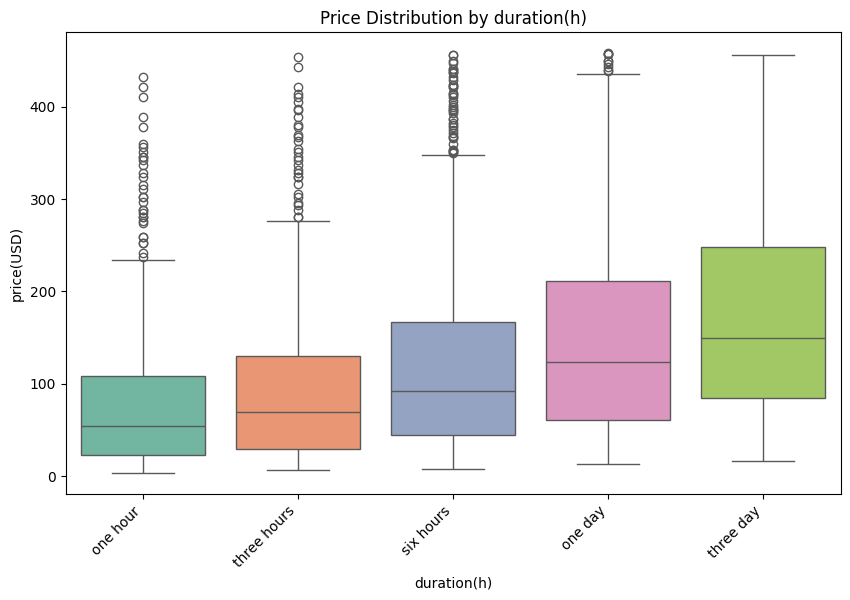

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


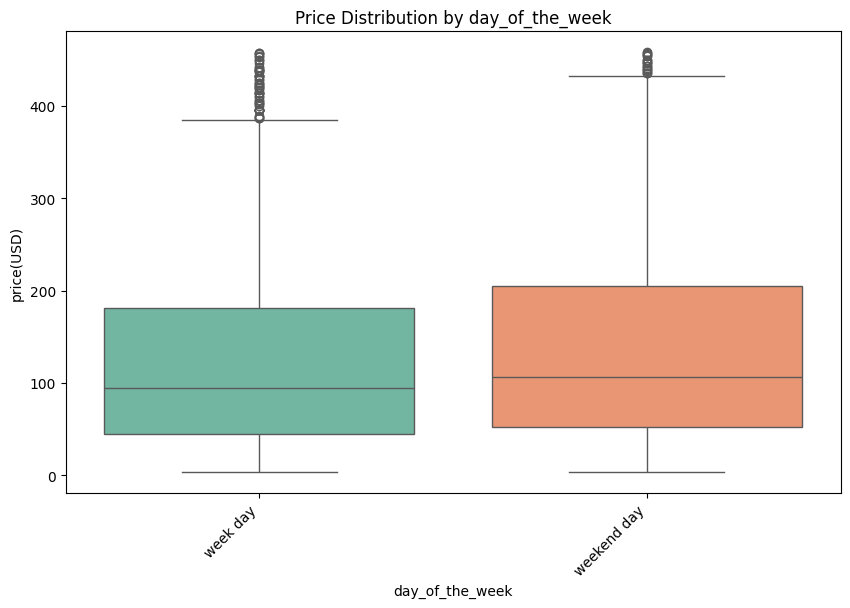

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\3762087483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')


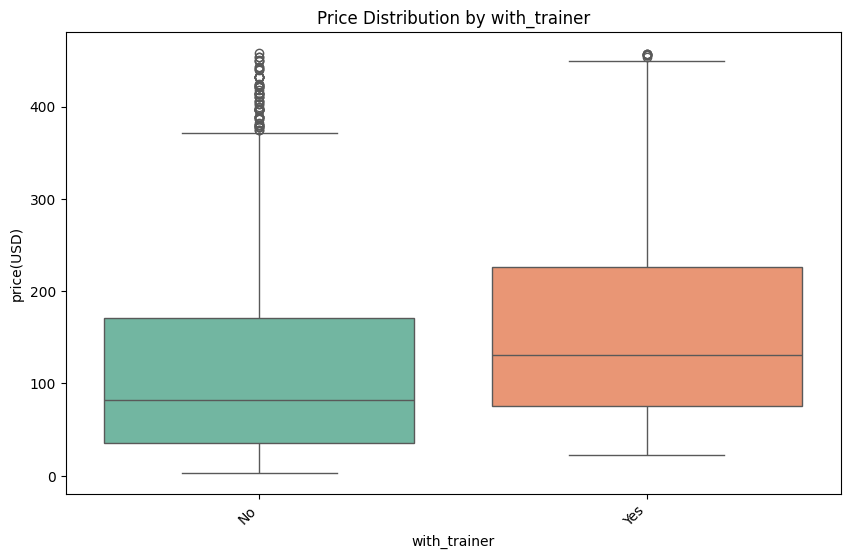

In [11]:


import seaborn as sns
import matplotlib.pyplot as plt


for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['price(USD)'], palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Price Distribution by {col}")
    plt.show()


C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


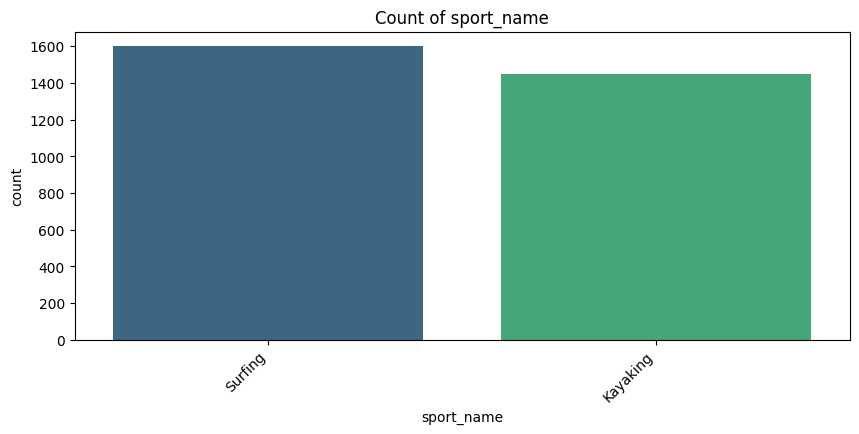

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


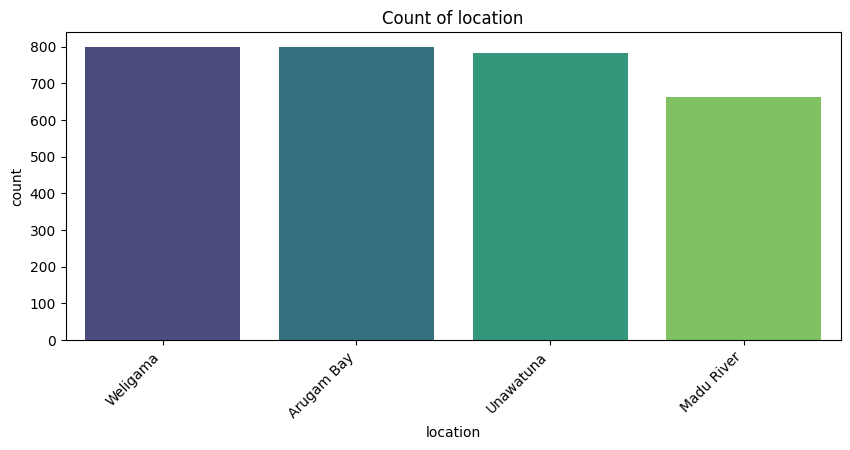

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


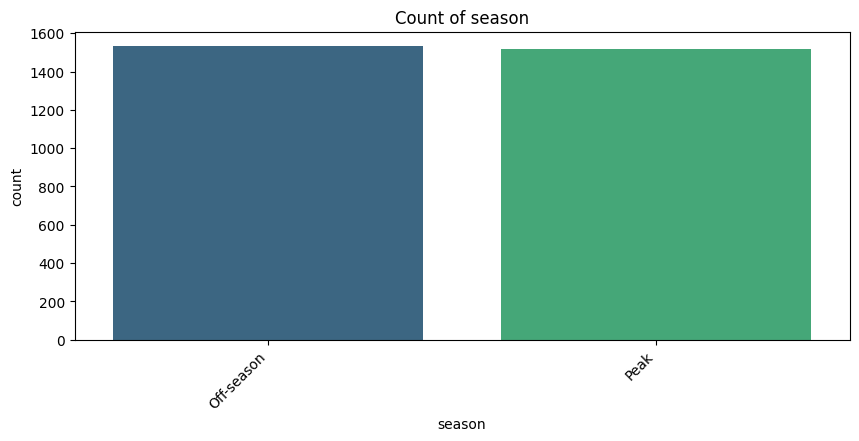

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


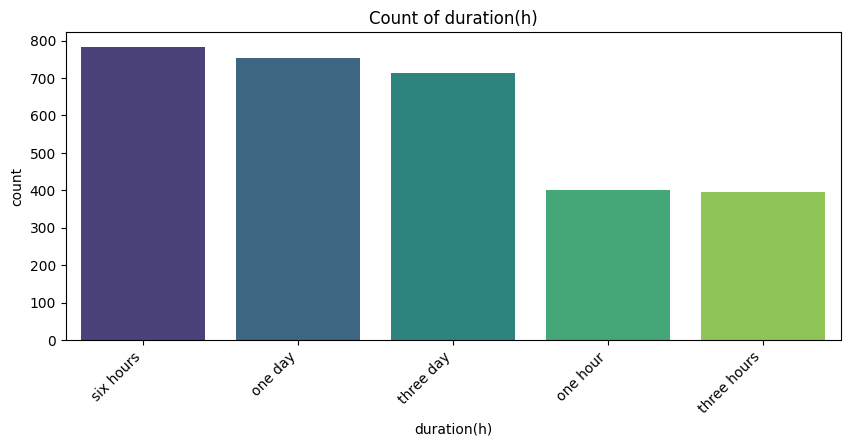

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


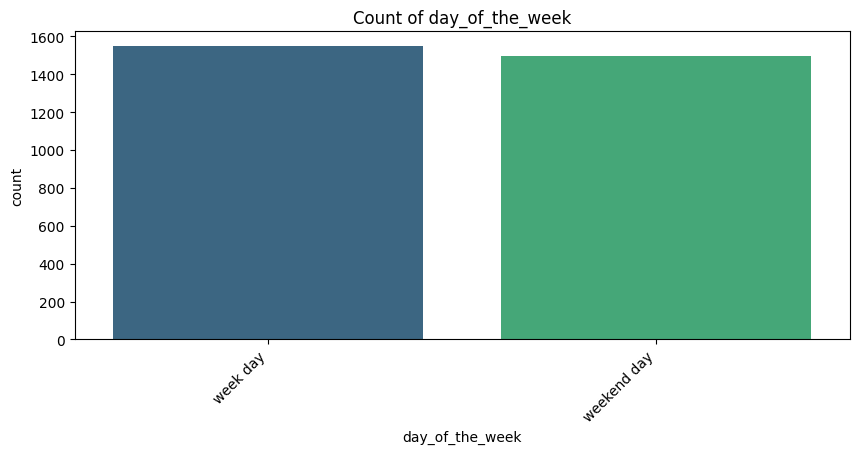

C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


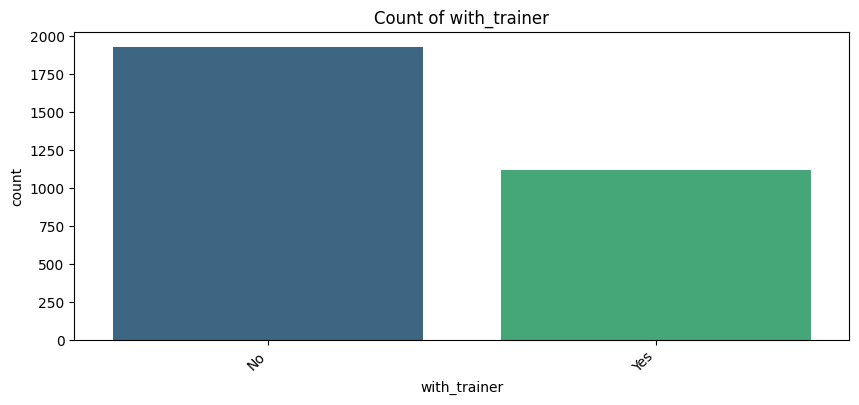

In [12]:

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Count of {col}")
    plt.show()


In [13]:
from scipy.stats import f_oneway

for col in categorical_columns:
    categories = df[col].unique()
    data = [df[df[col] == cat]['price(USD)'] for cat in categories]
    f_stat, p_val = f_oneway(*data)
    print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"There's a significant difference in price across the categories of {col}.")
    else:
        print(f"No significant difference in price across the categories of {col}.")
    print()


ANOVA for sport_name: F-statistic = 463.82, p-value = 0.0000
There's a significant difference in price across the categories of sport_name.

ANOVA for location: F-statistic = 190.19, p-value = 0.0000
There's a significant difference in price across the categories of location.

ANOVA for season: F-statistic = 4.13, p-value = 0.0422
There's a significant difference in price across the categories of season.

ANOVA for duration(h): F-statistic = 67.44, p-value = 0.0000
There's a significant difference in price across the categories of duration(h).

ANOVA for day_of_the_week: F-statistic = 8.96, p-value = 0.0028
There's a significant difference in price across the categories of day_of_the_week.

ANOVA for with_trainer: F-statistic = 121.99, p-value = 0.0000
There's a significant difference in price across the categories of with_trainer.



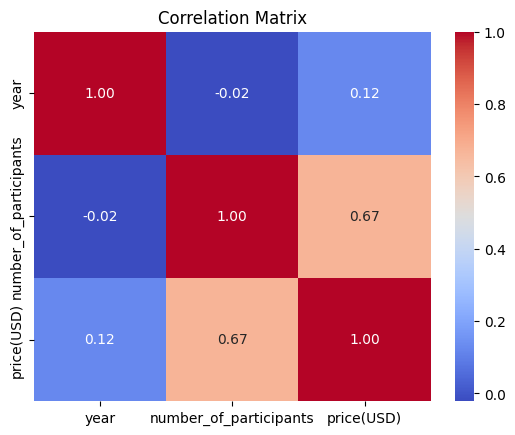

In [14]:
corr = df[['year', 'number_of_participants', 'price(USD)']].corr()



sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\2836997147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


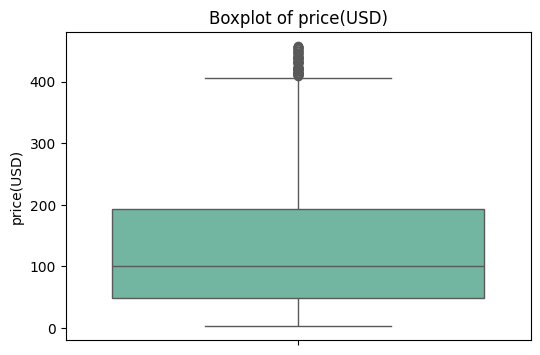

In [15]:
numerical_columns = [ 'price(USD)']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [16]:
# Calculate IQR
Q1 = df['price(USD)'].quantile(0.25)
Q3 = df['price(USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price(USD)'] >= lower_bound) & (df['price(USD)'] <= upper_bound)]



C:\Users\Hashan\AppData\Local\Temp\ipykernel_10956\2836997147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


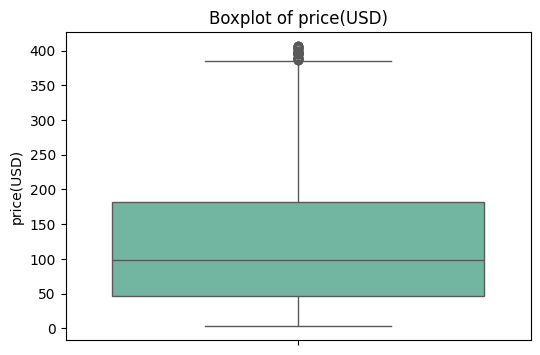

In [17]:
numerical_columns = [ 'price(USD)']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Hashan\anaconda3\envs\ml_env\Lib\site-packages

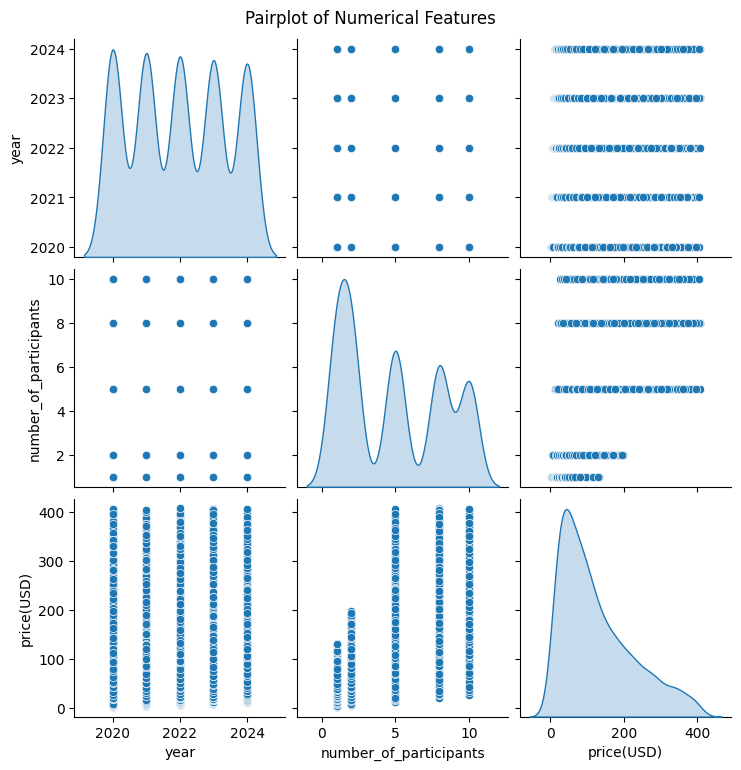

In [18]:
sns.pairplot(df[['year','number_of_participants', 'price(USD)']], diag_kind='kde', markers='o', palette='husl')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [19]:
X = df.drop(columns='price(USD)', axis=1)
y = df['price(USD)']

In [20]:
def encode_year(X):
    year_min = X.min()
    year_max = X.max()
    year_sin = np.sin(2 * np.pi * (X - year_min) / year_max)
    year_cos = np.cos(2 * np.pi * (X - year_min) / year_max)
    return np.c_[year_sin, year_cos]

In [21]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['sport_name',
 'location',
 'season',
 'duration(h)',
 'day_of_the_week',
 'with_trainer']

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        # ('year_cyclical', FunctionTransformer(encode_year, validate=False), ['year'])
    ],
    remainder='passthrough'
)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1),
}


In [25]:
best_rmse = float("inf")
best_r2 = float("-inf")
best_model = None
best_model_name = ""

results = []

Linear Regression: RMSE = 39.97, R² = 0.83


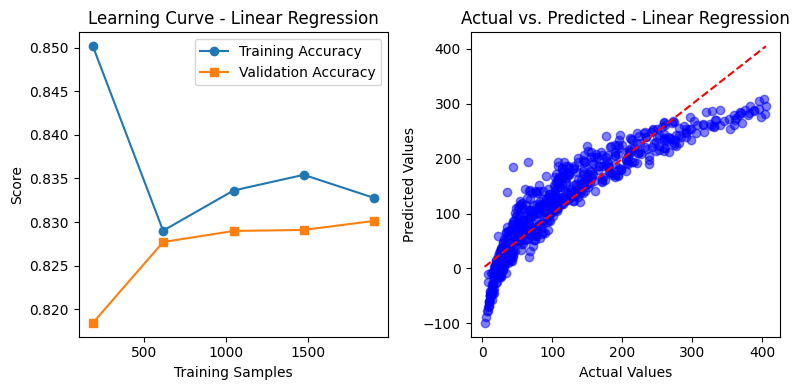

Ridge Regression: RMSE = 39.91, R² = 0.83


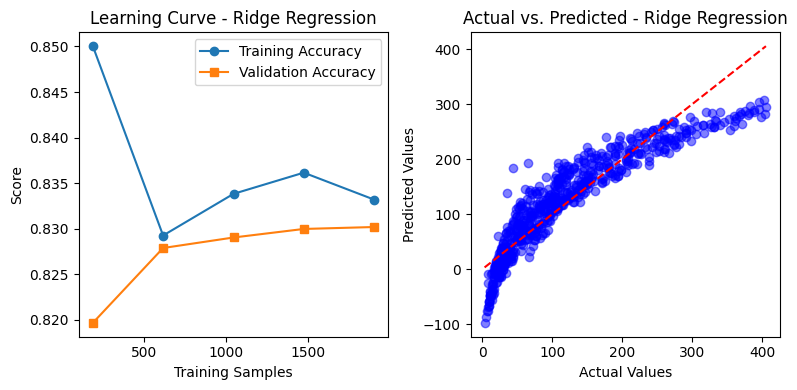

Lasso Regression: RMSE = 39.87, R² = 0.83


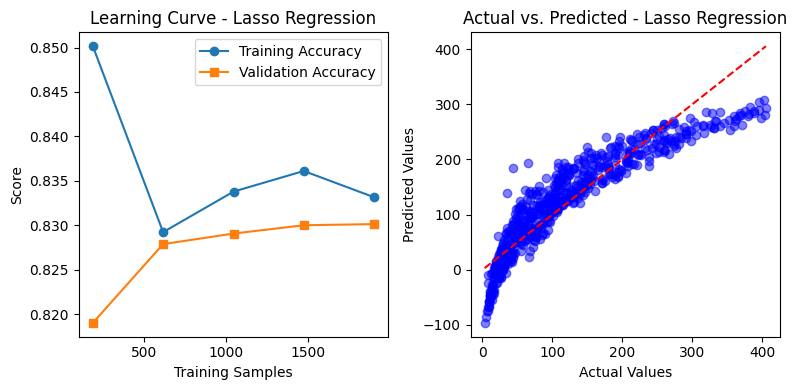

Random Forest: RMSE = 9.46, R² = 0.99


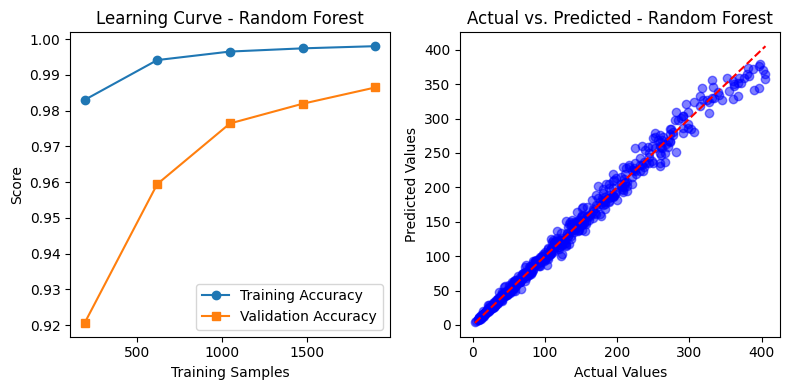

Decision Tree: RMSE = 13.51, R² = 0.98


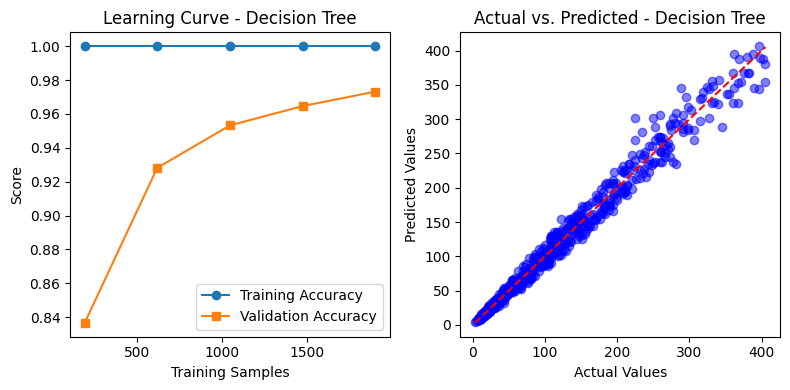

Support Vector Regressor: RMSE = 100.33, R² = -0.09


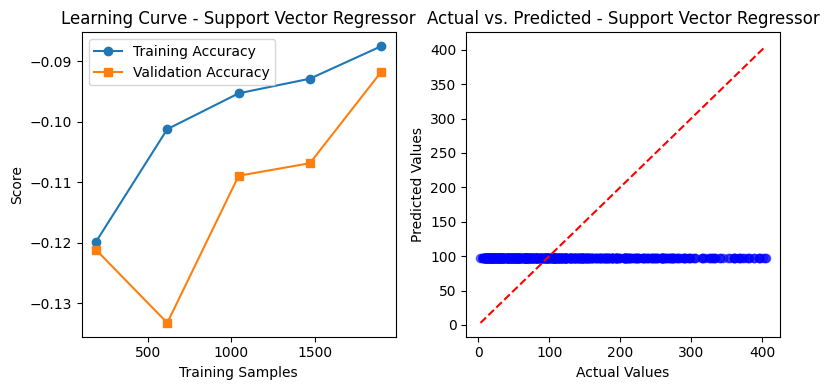


Best Model: Random Forest with RMSE = 9.46 and R² = 0.99
[{'Model': 'Linear Regression', 'RMSE': '39.97', 'R²': '0.83'}, {'Model': 'Ridge Regression', 'RMSE': '39.91', 'R²': '0.83'}, {'Model': 'Lasso Regression', 'RMSE': '39.87', 'R²': '0.83'}, {'Model': 'Random Forest', 'RMSE': '9.46', 'R²': '0.99'}, {'Model': 'Decision Tree', 'RMSE': '13.51', 'R²': '0.98'}, {'Model': 'Support Vector Regressor', 'RMSE': '100.33', 'R²': '-0.09'}]


In [ ]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "RMSE": f"{rmse:.2f}", "R²": f"{r2:.2f}"})
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")
    
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_model = pipeline
        best_model_name = name

    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    axes[0].plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
    axes[0].plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
    axes[0].set_xlabel("Training Samples")
    axes[0].set_ylabel("Score")
    axes[0].set_title(f"Learning Curve - {name}")
    axes[0].legend()

    # Actual vs. Predicted Scatter Plot
    axes[1].scatter(y_test, y_pred, alpha=0.5, color='blue')
    axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  
    axes[1].set_xlabel("Actual Values")
    axes[1].set_ylabel("Predicted Values")
    axes[1].set_title(f"Actual vs. Predicted - {name}")

    plt.tight_layout()
    plt.show()  

print(f"\nBest Model: {best_model_name} with RMSE = {best_rmse:.2f} and R² = {best_r2:.2f}")



In [29]:
results

[{'Model': 'Linear Regression', 'RMSE': '39.97', 'R²': '0.83'},
 {'Model': 'Ridge Regression', 'RMSE': '39.91', 'R²': '0.83'},
 {'Model': 'Lasso Regression', 'RMSE': '39.87', 'R²': '0.83'},
 {'Model': 'Random Forest', 'RMSE': '9.46', 'R²': '0.99'},
 {'Model': 'Decision Tree', 'RMSE': '13.51', 'R²': '0.98'},
 {'Model': 'Support Vector Regressor', 'RMSE': '100.33', 'R²': '-0.09'}]

In [30]:
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

## do predictions

NameError: name 'df' is not defined

In [31]:
for_prediction = df[83:84]
for_prediction

,year,sport_name,location,season,duration(h),number_of_participants,day_of_the_week,with_trainer,price(USD)
83,2022,Surfing,Weligama,Peak,three hours,1,weekend day,No,13.2


In [32]:
for_prediction = df[83:84].drop("price(USD)", axis=1)

In [33]:
for_prediction

,year,sport_name,location,season,duration(h),number_of_participants,day_of_the_week,with_trainer
83,2022,Surfing,Weligama,Peak,three hours,1,weekend day,No


In [34]:
predicted_price = best_model.predict(for_prediction)
predicted_price

array([13.0052])